# Multiple Linear Regression: Sales vs TV and Radio Advertising

This notebook reproduces the provided Python script in a Jupyter-friendly format. It:

- Loads the `Advertising.csv` dataset
- Fits a multiple linear regression model predicting `sales` from `TV` and `radio`
- Prints the learned intercept and coefficients
- Visualizes the regression plane in 3D along with the observed data points

## Requirements
- Python with `pandas`, `numpy`, `scikit-learn`, and `matplotlib`
- The file `Advertising.csv` available in the current working directory (or update the path in the data loading cell)

## How to use
Run the cells from top to bottom. If the CSV is in a different folder, edit the path in the data loading cell accordingly.


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
# Machine Learning Library
import sklearn.linear_model as skl_lm
# Plotting Library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# read in data
advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
# extract predictors and response
X = advertising[['TV', 'radio']]
y = advertising.sales

# use the function that sklearn provides to do the LR
regr = skl_lm.LinearRegression()
regr.fit(X, y)

# obtain the model parameters
print(regr.intercept_)
print(regr.coef_)


2.9210999124051362
[0.04575482 0.18799423]


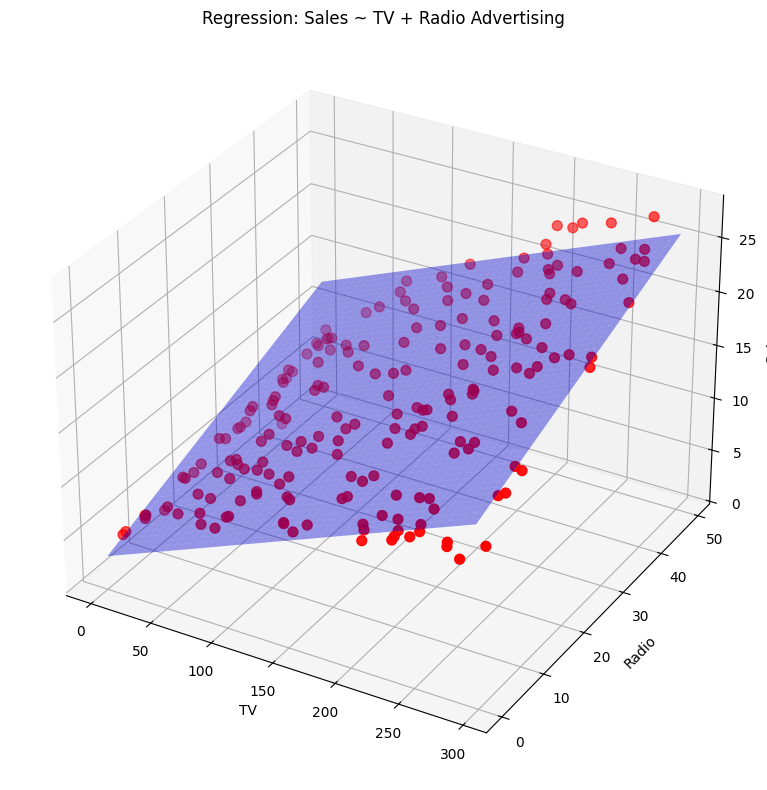

In [4]:
# plot graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use data-driven ranges with some padding
TV_min, TV_max = advertising['TV'].min(), advertising['TV'].max()
radio_min, radio_max = advertising['radio'].min(), advertising['radio'].max()

TV_range = np.linspace(TV_min, TV_max, 50)
radio_range = np.linspace(radio_min, radio_max, 50)
TV_ax, Radio_ax = np.meshgrid(TV_range, radio_range, indexing='xy')

# Calculate the predicted surface
Z = regr.intercept_ + TV_ax*regr.coef_[0] + Radio_ax*regr.coef_[1]

# Plot the surface
ax.plot_surface(TV_ax, Radio_ax, Z, alpha=0.4, color='blue', label='Regression Plane')

# Plot the actual data points
ax.scatter3D(advertising['TV'], advertising['radio'], advertising['sales'], c='r', s=50, label='Data Points')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.title('Regression: Sales ~ TV + Radio Advertising', fontsize=12)

plt.tight_layout()
plt.show()
